# Ensemble Models – A Classification Project Using Random Forest for the Cement Industry

## **1. Objective**

Applying ensemble models texhniques to solve classification problems using Random Forest

## **2. Business Logic**
Given a dataset consisting of various characteristics of concrete mixtures as predictor features and `outcome` as a target feature which determines whether the strength of the mixture is high or low. Build a model to predict whether the strength of the mixture is high or low.

The target feature for this task is `outcome`, which can have one of two values, 0 and 1. 
- 0 indicates that the strength of the mixture is low, 
- 1 indicates that the strength of the mixture is high.

## **3. Loading the Dataset**

In this section, the dataset is imported into the project using the pandas library. The data is read from a CSV file and stored in a DataFrame for further exploration and preprocessing.

In [1]:
# Import Pandas library
import pandas as pd

# The information dataset for the training set is already loaded below
data = pd.read_csv('/Users/sergiooyola/Desktop/GitHub_Projects/MachineLearning_CementStrength/cement_data.csv')

## **4. Dataset Overview**

This section provides a quick glimpse of the dataset using the **head()** function. The preview shows the descriptive variables `cement_water`, `slag`, `fly_ash`, `plasticizer`, `coarse_fine_aggregate`, and `age`, along with the target variable `outcome`.

In [2]:
data.head()

,id,cement_water,slag,fly_ash,plasticizer,coarse_fine_aggregate,age,outcome
0,0,three hundred and two;203.0,0.0,0.0,0.0,"974.0,817.0",14,0.0
1,1,one hundred and fifty-one;184.4,0.0,111.9,7.9,992.0;815.9,28,0.0
2,2,three hundred and sixty-two_164.9,189.0,0.0,11.6,944.7;755.8,91,1.0
3,3,"two hundred and fifty-one,188.5",0.0,118.3,5.8,"1028.4,757.7",100,1.0
4,4,one hundred and fifty-five_193.0,0.0,143.0,9.0,877.0_868.0,28,0.0




As we can see, the dataset contains two problematic columns: `cement_water` and `coarse_fine_aggregate`.

1. `cement_water` column
    * Contains two variables: one for cement (written in words) and one for water (numeric).
    * Both variables are separated by inconsistent delimiters (“;”, “,”, “_”, etc.).

2. `coarse_fine_aggregate` column
    * Contains two variables: one for coarse and one for fine, both numeric.
    * Both variables are separated by inconsistent delimiters (“;”, “,”, “_”, etc.).

## **5. Data Cleanup and Preparation**

To address the issues with the data, custom functions will be implemented:

1. **text_to_int()**: Converts textual numbers (e.g., "twenty") to integers.
2. **split_cement_water()**: Splits the `cement_water` column into separate cement and water columns.
3. **split_aggregate()**: Splits the `coarse_fine_aggregate` column into separate coarse and fine columns.

In [3]:
# Import regular expressions
import re

# Function to convert textual numbers to integers
def text_to_int(text):
    # Normalize the input text (lowercase, remove commas, and strip whitespace at the beginning and at the end)
    text = text.lower().replace(',', '').strip()
    # Dictionary mapping textual numbers to integer values
    words_to_numbers = {
        'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11,
        'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15,
        'sixteen': 16, 'seventeen': 17, 'eighteen': 18, 'nineteen': 19,
        'twenty': 20, 'thirty': 30, 'forty': 40, 'fifty': 50,
        'sixty': 60, 'seventy': 70, 'eighty': 80, 'ninety': 90,
        'hundred': 100, 'thousand': 1000
    }
    
    try:
        # Parse textual numbers
        tokens = re.split(r'\s+|and', text) # Split the input text into tokens using whitespace or the word "and" as delimiters
        total = 0 # Initialize variable to track the total value
        current = 0 # Initialize variable to track the current number being processed
        for token in tokens: # Iterate through each token in the input
            if token in words_to_numbers: # If the token is in the dictionary
                value = words_to_numbers[token] # Initialize variable "value" that tracks each number within "words_to_numbers" dict.
                if value == 100 or value == 1000: # If the tocken is 100 or 1000...
                    current *= value #... multiplies the current value by 100 or 1000
                else:
                    current += value # Else, for other numeric values, the token's value is added to current
            else:
                total += current # If the token is not recognized, the accumulated current value is added to "total"...
                current = 0 #... and "current" is reset to zero
        
        # Returns the final sum "total + current" if it's greater than zero...
        #... If no textual number is found, convert the input number to integer
        return total + current if total + current > 0 else int(text)
    except:
        return None # If there is any error, returns "None"

# Function to split cement_water into cement and water
def split_cement_water(value):
    try:
        # Normalize separators
        value = re.sub(r'[;,]', '_', value)  # Replace ';' and ',' with '_'
        parts = value.split('_') # Splits the normalized string into parts using '_'
        cement_part = parts[0].strip() # Assign the first part as the cement value
        water_part = parts[-1].strip() # Assign the last part as the water value

        # If it is not already numeric, calls "text_to_int" to handle textual numbers
        #... Else, the number is converted integer
        cement = text_to_int(cement_part) if not cement_part.isdigit() else int(cement_part)
        water = float(water_part) # Converts water part to float
        return cement, water # Returns the processed cement and water as a tuple
    except Exception as e:
        return None, None # If an error occurs, returns None, None (also as a tuple)

# Apply the splitting function to the cement_water column

# Two columns are created into the df: "cement" and "water"
# The lambda function takes each value x in column "cement_water" as input
#... converts it into string and then passes it to the "split_cement_water" function
data[['cement', 'water']] = data['cement_water'].apply(
    lambda x: pd.Series(split_cement_water(str(x)))
)

# Drop the original cement_water column
data.drop(columns=['cement_water'], inplace=True)

data.head()

,id,slag,fly_ash,plasticizer,coarse_fine_aggregate,age,outcome,cement,water
0,0,0.0,0.0,0.0,"974.0,817.0",14,0.0,302.0,203.0
1,1,0.0,111.9,7.9,992.0;815.9,28,0.0,100.0,184.4
2,2,189.0,0.0,11.6,944.7;755.8,91,1.0,300.0,164.9
3,3,0.0,118.3,5.8,"1028.4,757.7",100,1.0,200.0,188.5
4,4,0.0,143.0,9.0,877.0_868.0,28,0.0,100.0,193.0


In [4]:
# Function to split coarse_fine_aggregate into two separate columns
def split_aggregate(value):
    try:
        coarse = float(value[:5].strip()) # Extract the first five characters for coarse
        fine = float(value[-5:].strip()) # Extract the last five characters for coarse
        return coarse, fine # Return a tuple containing the coarse and fine values
    except Exception:
        return None, None # If any error occurs, return None for both Coarse and Fine

# Apply the splitting function to the coarse_fine_aggregate column

# Same as the previous lambda function
data[['coarse', 'fine']] = data['coarse_fine_aggregate'].apply(
    lambda x: pd.Series(split_aggregate(str(x)))
)

# Drop the original coarse_fine_aggregate column
data.drop(columns=['coarse_fine_aggregate'], inplace=True)

data.head()

,id,slag,fly_ash,plasticizer,age,outcome,cement,water,coarse,fine
0,0,0.0,0.0,0.0,14,0.0,302.0,203.0,974.0,817.0
1,1,0.0,111.9,7.9,28,0.0,100.0,184.4,992.0,815.9
2,2,189.0,0.0,11.6,91,1.0,300.0,164.9,944.7,755.8
3,3,0.0,118.3,5.8,100,1.0,200.0,188.5,1028.0,757.7
4,4,0.0,143.0,9.0,28,0.0,100.0,193.0,877.0,868.0


## **6. Good Data Practices**

Effective data cleanup is essential for the success of any machine learning project. In this case, preprocessing functions transformed raw, inconsistent data into a clean, structured format, enabling reliable analysis and model training.

While preprocessing mitigates inconsistencies, the dataset highlights poor data collection practices, such as inconsistent formatting and combined variables. Addressing these issues directly with the company could improve data quality at the source, reducing the need for extensive cleanup in future projects.

## **7. Missing and Duplicated Values**

Before proceeding with model training, it is important to ensure data integrity. This step checks for missing and duplicated values, confirming that the dataset is clean and free of issues that could impact model performance.

In [5]:
data.isnull().sum()

id             0
slag           0
fly_ash        0
plasticizer    0
age            0
outcome        0
cement         0
water          0
coarse         0
fine           0
dtype: int64

In [6]:
data.duplicated().sum()

0

## **8. Some Statistics**

This section provides an overview of the dataset through descriptive statistics and correlation analysis. Key insights include data distributions, feature ranges, and relationships between variables, which are essential for understanding the dataset and guiding feature selection.

In [7]:
data.describe()

,id,slag,fly_ash,plasticizer,age,outcome,cement,water,coarse,fine
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,73.028000,51.247455,6.363636,44.710909,0.485455,258.210909,180.574182,975.697818,777.169636
std,158.915596,84.476832,63.363325,6.199776,61.659932,0.500243,113.314251,21.069773,79.459038,80.421658
min,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,100.000000,121.800000,801.000000,594.000000
25%,137.250000,0.000000,0.000000,0.000000,7.000000,0.000000,192.500000,164.825000,932.000000,735.475000
50%,274.500000,22.000000,0.000000,6.700000,28.000000,0.000000,238.000000,184.000000,968.000000,781.000000
75%,411.750000,143.750000,115.250000,10.300000,56.000000,1.000000,313.000000,192.000000,1043.750000,825.500000
max,549.000000,342.100000,200.100000,32.200000,365.000000,1.000000,540.000000,247.000000,1134.000000,992.600000


**Descriptive Statistics Table:** This table provides key summary statistics for each feature in the dataset, such as count, mean, standard deviation, minimum, and maximum values. It offers insights into the distribution of variables, such as the wide range of cement quantities (100 to 540) and ages of mixtures (7 to 365 days). These statistics help identify potential outliers and understand the scale of the data.

In [8]:
data.corr()

,id,slag,fly_ash,plasticizer,age,outcome,cement,water,coarse,fine
id,1.000000,0.048362,0.028857,0.069718,-0.044021,-0.016371,-0.013400,-0.031221,-0.078931,0.047342
slag,0.048362,1.000000,-0.355985,0.038508,-0.012357,0.103371,-0.195087,0.103183,-0.280701,-0.278628
fly_ash,0.028857,-0.355985,1.000000,0.342277,-0.143924,-0.103959,-0.414808,-0.219680,0.002198,0.088434
plasticizer,0.069718,0.038508,0.342277,1.000000,-0.137153,0.333130,0.124500,-0.701921,-0.298669,0.245109
age,-0.044021,-0.012357,-0.143924,-0.137153,1.000000,0.408541,0.126396,0.256515,-0.004968,-0.200747
outcome,-0.016371,0.103371,-0.103959,0.333130,0.408541,1.000000,0.489709,-0.272620,-0.178485,-0.162778
cement,-0.013400,-0.195087,-0.414808,0.124500,0.126396,0.489709,1.000000,-0.168005,-0.097692,-0.214406
water,-0.031221,0.103183,-0.219680,-0.701921,0.256515,-0.272620,-0.168005,1.000000,-0.095441,-0.418998
coarse,-0.078931,-0.280701,0.002198,-0.298669,-0.004968,-0.178485,-0.097692,-0.095441,1.000000,-0.261690
fine,0.047342,-0.278628,0.088434,0.245109,-0.200747,-0.162778,-0.214406,-0.418998,-0.261690,1.000000


**Correlation Table:** This table shows pairwise correlations between features, revealing how strongly they are related. For the target variable "outcome", there is a moderate positive correlation with age (0.41) and plasticizer (0.33), indicating that older mixtures and higher plasticizer content may contribute to higher strength. Weak or negative correlations with other variables suggest less direct influence on the target. This analysis helps identify importance features before modeling.

## **8. Model Implemenation**

This section focuses on building and evaluating the Random Forest classification model for predicting the target variable "outcome". The process includes:

1. **Feature-Target Split:** Separating the dataset into features (X) and the target variable (y).
2. **Train-Test Split:** Splitting the data into training and validation sets to evaluate the model's generalization performance.
3. **Model Training:** Implementing a **RandomForestClassifier** and training it on the training data (X_train, y_train).
4. **Model Predictions:** Using the trained model to predict the target variable **"outcome"** for the validation dataset (X_val).

In [9]:
# Feature-target split
X = data.drop(['id', 'outcome'], axis=1) # The irrelevant variable 'id' is also dropped.
y = data['outcome']

In [10]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Generate Predictions
y_pred = model.predict(X_val)

## **9. Feature Importance**

This section evaluates the importance of each feature in the Random Forest model. The feature_importances_ attribute is used to extract the contribution of each feature to the model's predictions.

In [13]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
important_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in important_features:
    print(f'{feature}: {importance:.2f}')

Feature Importances:
age: 0.33
cement: 0.18
water: 0.13
plasticizer: 0.10
fine: 0.09
coarse: 0.07
slag: 0.05
fly_ash: 0.05


The output highlights the importance of each feature in the Random Forest model:

* Age (0.33) is the most influential feature, followed by Cement (0.18) and Water (0.13).
* Other features like Plasticizer (0.10), Fine Aggregate (0.09), and Coarse Aggregate (0.07) contribute but to a lesser extent.
* Slag (0.05) and Fly Ash (0.05) have minimal impact on predictions.

## **10. Results and Model Performance**

This section evaluates the performance of the Random Forest model using a classification report. The report provides detailed metrics for each class (0 and 1).

In [14]:
from sklearn.metrics import classification_report

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        57
         1.0       0.92      0.89      0.90        53

    accuracy                           0.91       110
   macro avg       0.91      0.91      0.91       110
weighted avg       0.91      0.91      0.91       110



The model achieved a robust performance in predicting cement strength.

1. Overall Accuracy:
    * As previously mentioned, the model achieved an accuracy of 91%, indicating that 91% of the predictions matched the actual labels.

2. Class-Specific Performance:

    * For class 0.0 (low strength):
        * Precision: 90% of the predicted low-strength mixtures were correct.
        * Recall: The model identified 93% of actual low-strength mixtures.
        * F1-Score: 91%, reflecting a balance between precision and recall.

    * For class 1.0 (high strength):
        * Precision: 92% of the predicted high-strength mixtures were correct.
        * Recall: The model identified 89% of actual high-strength mixtures.
        * F1-Score: 90%, indicating balanced performance for this class.

3. Macro and Weighted Averages:
    * Both macro and weighted averages for precision, recall, and F1-score are consistent at 91%, indicating balanced performance across both classes, regardless of their occurrences.

## **11. Confusion Matrix**

The confusion matrix provides a visual representation of the model's classification performance by comparing actual and predicted labels.

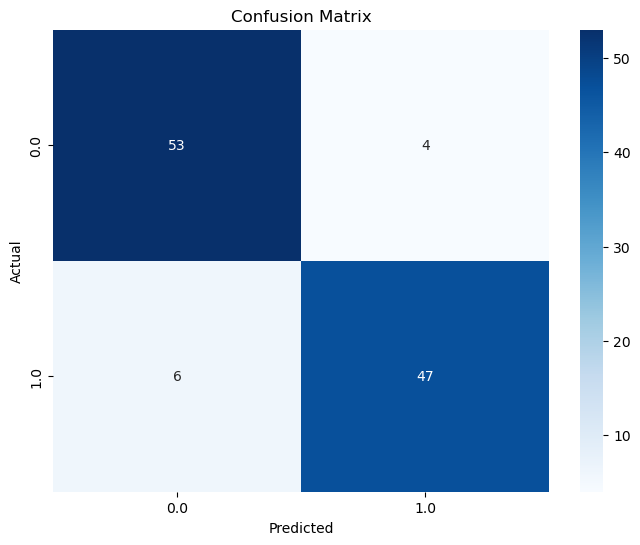

In [15]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix definition
conf_matrix = confusion_matrix(y_val, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Each cell in the matrix indicates the number of predictions for each combination of true and predicted classes:

* True Positives (47): cases where the model correctly predicted high strength (1) as high strength.
Indicates good performance for correctly identifying high-strength mixtures.

* True Negatives (53): cases where the model correctly predicted low strength (0) as low strength.
Shows the model is highly reliable in identifying low-strength mixtures.

* False Positives (4): cases where the model predicted high strength (1) but the actual value was low strength (0.0).
Represents overprediction of high-strength mixtures.

* False Negatives (6): cases where the model predicted low strength (0) but the actual value was high strength (1.0).
Represents underprediction of high-strength mixtures.

## **12. Actual Vs Predicted Values**

The bar plot compares the distribution of actual and predicted values for the target variable "outcome", which represents cement strength.

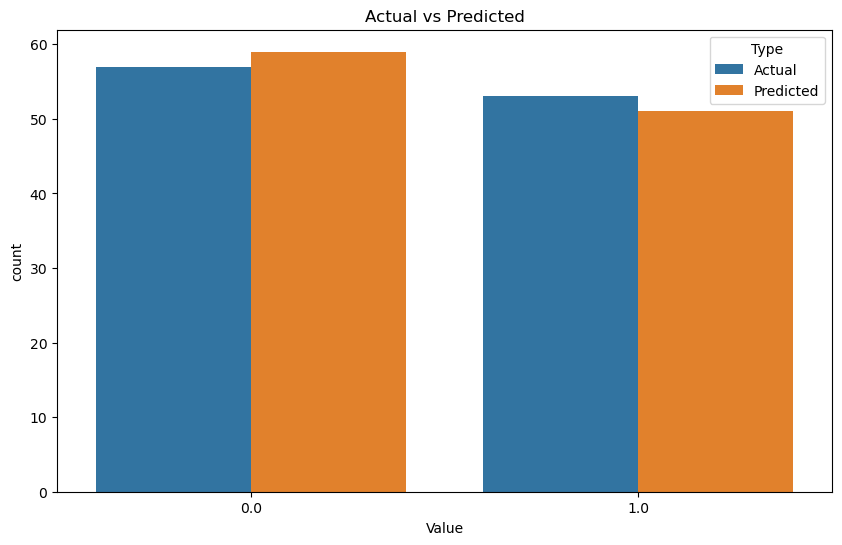

In [16]:
# Actual vs Predicted values

comparison_data = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred
})

plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_data.melt(var_name='Type', value_name='Value'), x='Value', hue='Type')
plt.title("Actual vs Predicted")
plt.show()

Below are some relevant aspects to highlight from the Actual Vs Predicted bar chart:

* **Balanced Prediction**: The model predicts both classes (0 and 1) almost equally, indicating no significant bias toward one class.

* **Alignment with Actual Values**: The predicted value counts closely match the actual counts for both classes. This reflects that the model effectively captures the underlying distribution of the data.

* **Overall Performance:** Minimal discrepancies between actual and predicted values suggest the model has strong classification performance, consistent with its reported accuracy of 91%.